In [4]:
## import necessary modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('darkgrid')

In [5]:
## import csv file

df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
#No. of rows and columns

df.shape

(10000, 14)

# Analyze Each Feature

In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


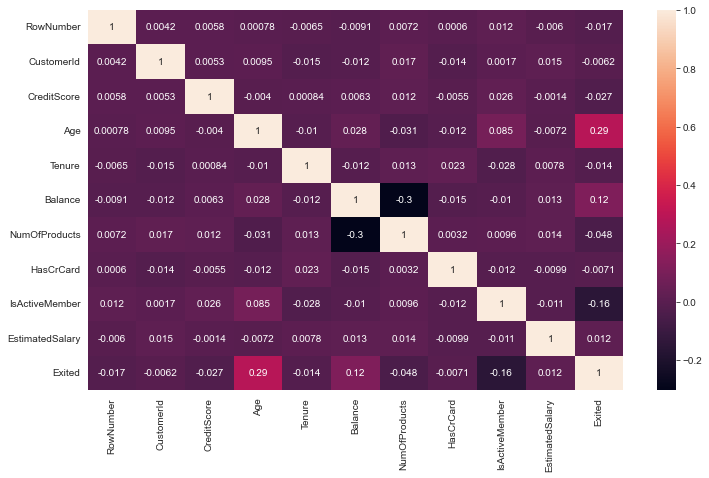

In [8]:
# correlation within features

plt.figure(figsize=(12,7))
corrMat=df.corr()
sns.heatmap(corrMat, annot=True)
plt.show()

# Geography

In [9]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [10]:
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

Text(0.5, 1.0, 'Geography')

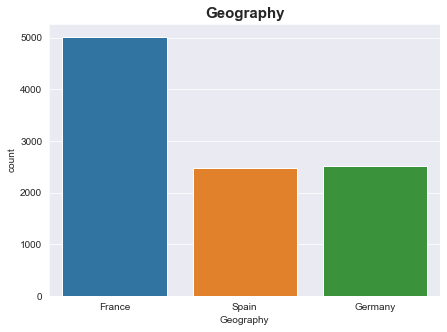

In [11]:
plt.figure(figsize=(7,5))
sns.countplot(x='Geography',data=df).set_title("Geography",fontsize=15,fontdict={"weight": "bold"})

Text(0.5, 1.0, 'No. of Customer (Exited vs Non Exited)')

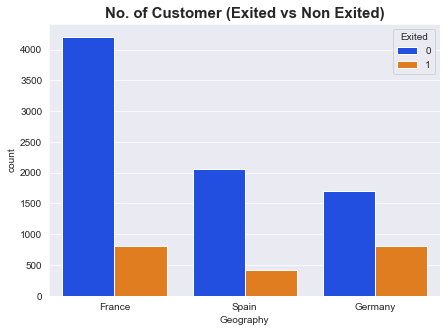

In [12]:
plt.figure(figsize=(7,5))
sns.countplot(x="Geography",hue="Exited",data=df,palette='bright').set_title("No. of Customer (Exited vs Non Exited)",fontsize=15,fontdict={"weight": "bold"})

# Gender

In [13]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

Text(0.5, 1.0, 'Gender')

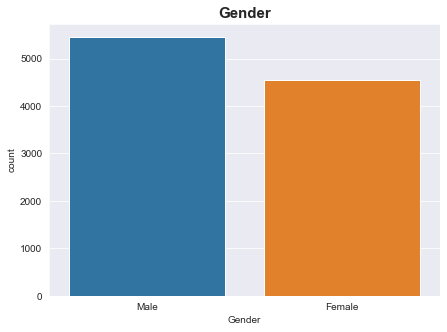

In [14]:
plt.figure(figsize=(7,5))
sns.countplot(x='Gender',order=["Male","Female"],data=df).set_title("Gender",fontsize=15,fontdict={"weight": "bold"})

Text(0.5, 1.0, 'No. of Customer (Exited vs Non Exited)')

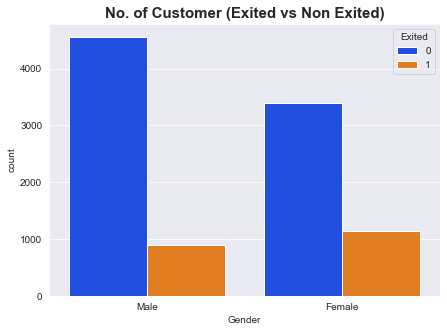

In [15]:
plt.figure(figsize=(7,5))
sns.countplot(x="Gender",hue="Exited",data=df,palette='bright',order=["Male","Female"]).set_title("No. of Customer (Exited vs Non Exited)",fontsize=15,fontdict={"weight": "bold"})

# Gender-Geography

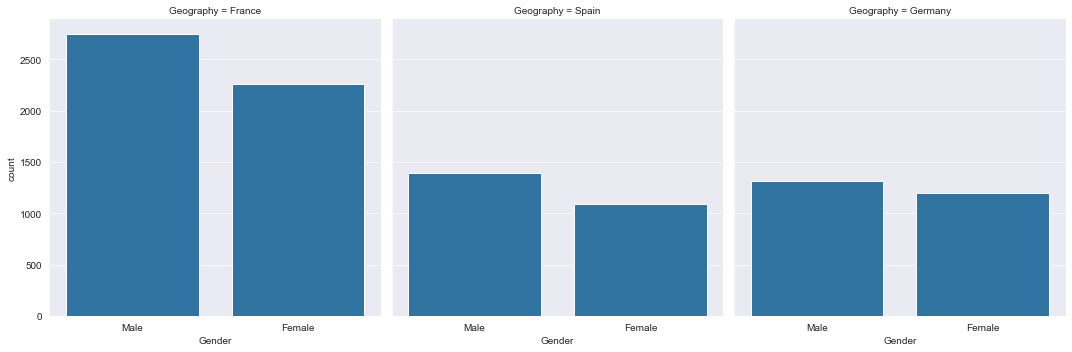

In [16]:
g = sns.FacetGrid(data=df, col="Geography", height=5, aspect=1)
g.map(sns.countplot, "Gender",  order=["Male", "Female"])

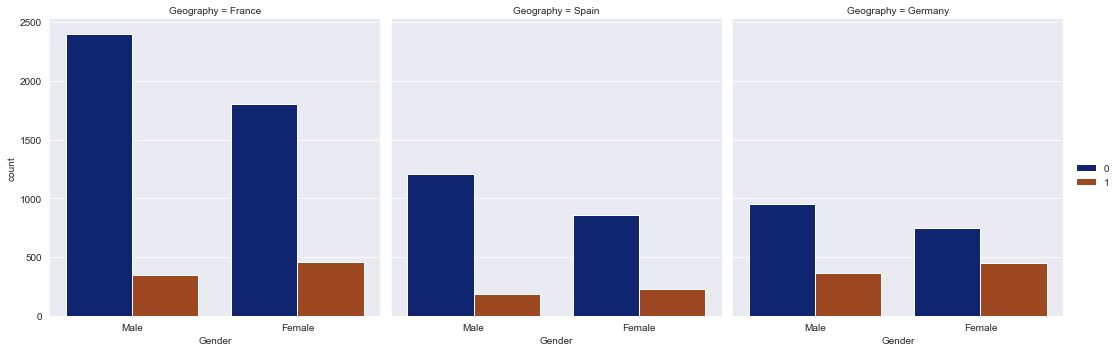

In [17]:
g = sns.FacetGrid(data=df, col="Geography", height=5, aspect=1)
g.map(sns.countplot, "Gender",hue="Exited" ,data=df,order=["Male", "Female"],palette="dark")
g.add_legend()  # 0 stands for Not Exited , 1 stands for Exited 

# Age

In [18]:
df['Age'].unique()

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83], dtype=int64)

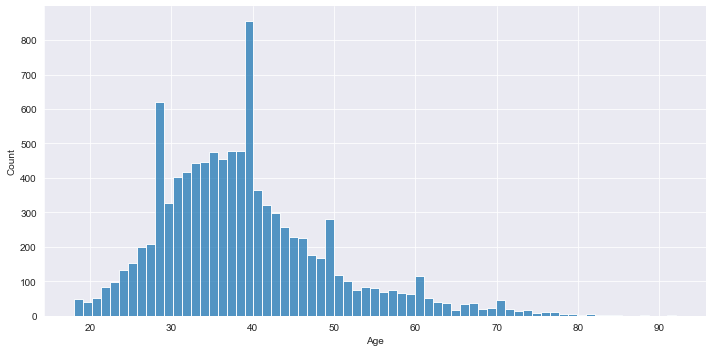

In [19]:
sns.displot(data=df, x="Age",height=5, aspect=2)

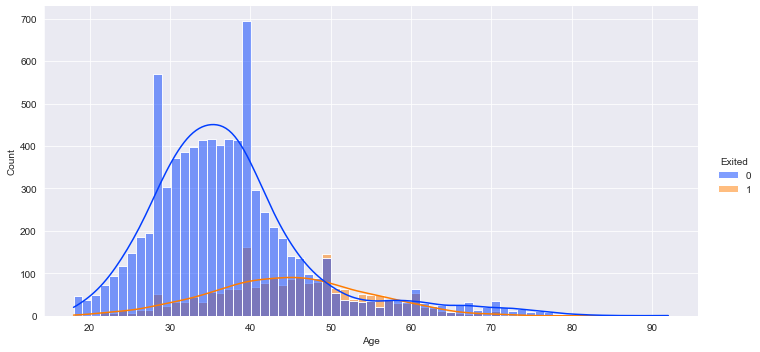

In [20]:
sns.displot(data=df, x="Age",hue="Exited",kind="hist",kde=True,palette="bright",height=5, aspect=2)

# No. of Product

Text(0.5, 1.0, 'No. of Product')

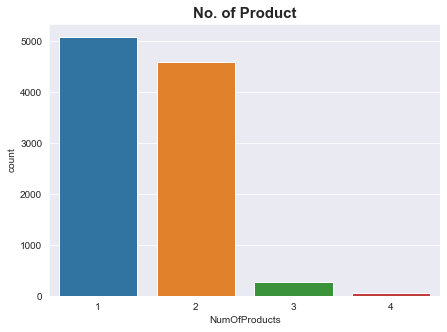

In [21]:
plt.figure(figsize=(7,5))
sns.countplot(x="NumOfProducts",data=df).set_title("No. of Product",fontsize=15,fontdict={"weight": "bold"})

Text(0.5, 1.0, 'No. of Customer (Exited vs Non Exited)')

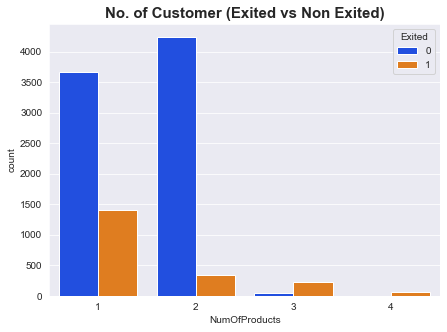

In [22]:
plt.figure(figsize=(7,5))
sns.countplot(x="NumOfProducts",hue="Exited",data=df,palette='bright').set_title("No. of Customer (Exited vs Non Exited)",fontsize=15,fontdict={"weight": "bold"})

# Tenure

Text(0.5, 1.0, 'Tenure')

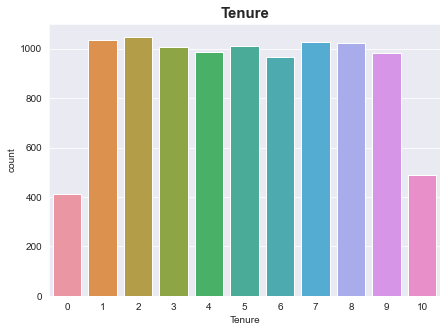

In [23]:
plt.figure(figsize=(7,5))
sns.countplot(x="Tenure",data=df).set_title("Tenure",fontsize=15,fontdict={"weight": "bold"})

Text(0.5, 1.0, 'No. of Customer (Exited vs Non Exited)')

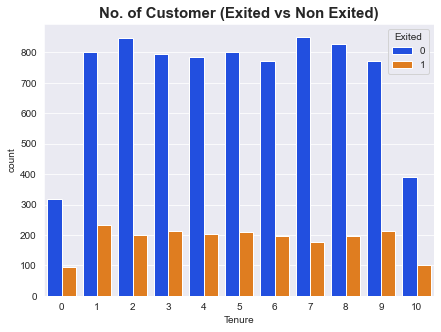

In [24]:
plt.figure(figsize=(7,5))
sns.countplot(x="Tenure",hue="Exited",data=df,palette='bright').set_title("No. of Customer (Exited vs Non Exited)",fontsize=15,fontdict={"weight": "bold"})

# Credit Card Holder

Text(0.5, 1.0, 'No.of  Credit Card Holder')

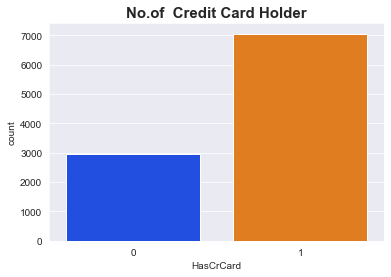

In [25]:
sns.countplot(x="HasCrCard",data=df,palette='bright').set_title("No.of  Credit Card Holder",fontsize=15,fontdict={"weight": "bold"})

Text(0.5, 1.0, 'No. of Customer (Exited vs Non Exited)')

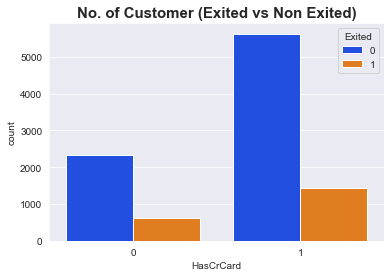

In [26]:
sns.countplot(x="HasCrCard",hue="Exited",data=df,palette='bright').set_title("No. of Customer (Exited vs Non Exited)",fontsize=15,fontdict={"weight": "bold"})

# Active Member

Text(0.5, 1.0, 'ActiveMember')

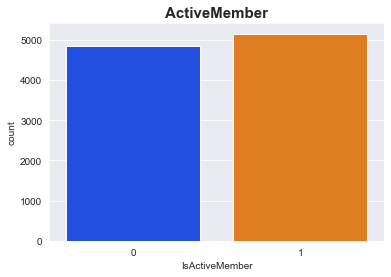

In [27]:
sns.countplot(x="IsActiveMember",data=df,palette='bright').set_title("ActiveMember",fontsize=15,fontdict={"weight": "bold"})

Text(0.5, 1.0, 'No. of Customer (Exited vs Non Exited)')

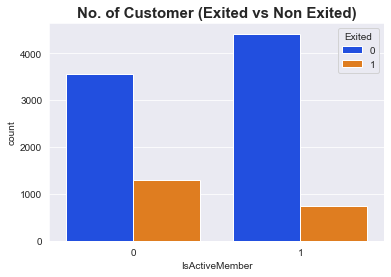

In [28]:
sns.countplot(x="IsActiveMember",hue="Exited",data=df,palette='bright').set_title("No. of Customer (Exited vs Non Exited)",fontsize=15,fontdict={"weight": "bold"})

# CreditScore

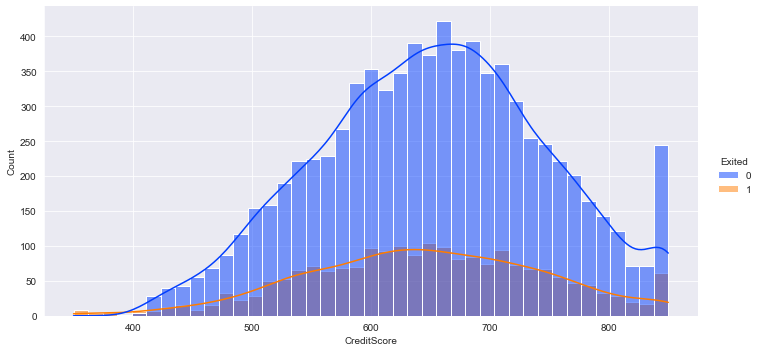

In [29]:
sns.displot(data=df, x="CreditScore",hue="Exited",palette="bright",kind="hist",kde=True,height=5, aspect=2)

# Balance

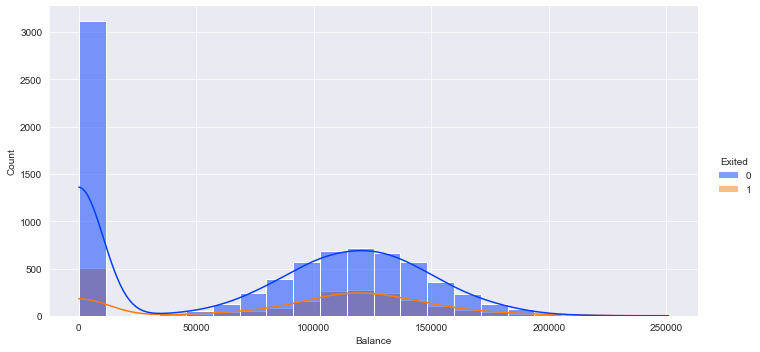

In [30]:
sns.displot(data=df, x="Balance",hue="Exited",kind="hist",kde=True,height=5, aspect=2,palette="bright")

# EstimatedSalary

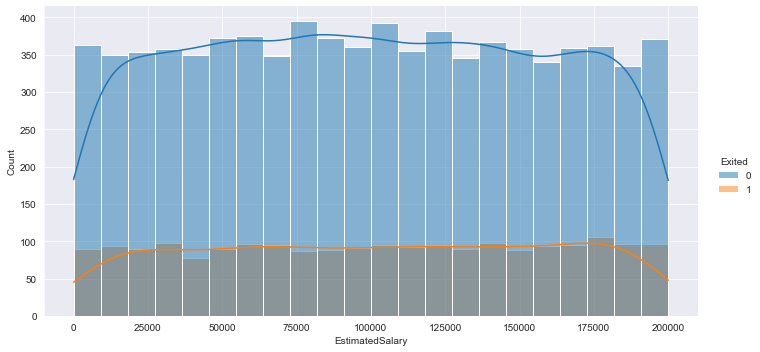

In [31]:
sns.displot(data=df, x="EstimatedSalary",hue="Exited",kind="hist",kde=True,height=5, aspect=2)